In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
#output data frames instead of arrays

set_config(transform_output="pandas")

In [30]:
#load in our dataset
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


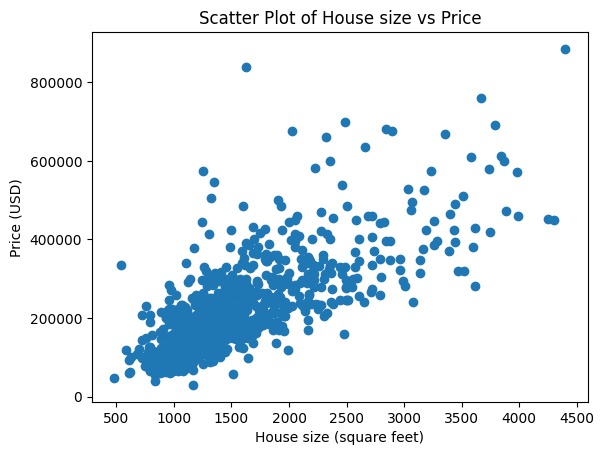

In [31]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [32]:
np.random.seed(10)
small_sacramento = sacramento.sample(n=30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


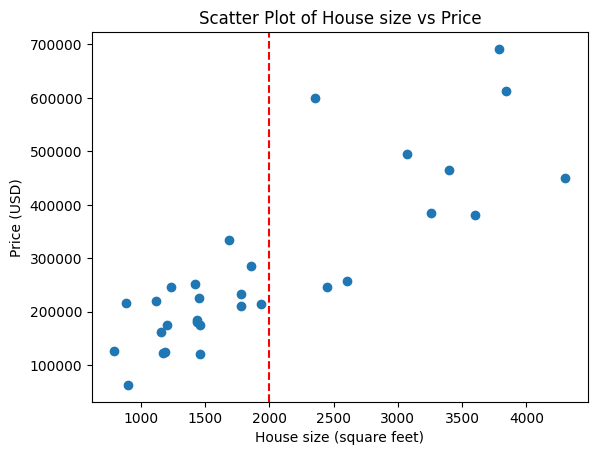

In [33]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [34]:
#calculate the absolute difference between 2000 and each house in our data
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()

In [35]:
#find the rows with the smallest difference
nearest_neighbors = small_sacramento.nsmallest(5, "dist")
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
599,5340 BIRK WAY,SACRAMENTO,95835,CA,3,2,1776,Residential,Tue May 20 00:00:00 EDT 2008,234000,38.672495,-121.515251,224
786,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214,310


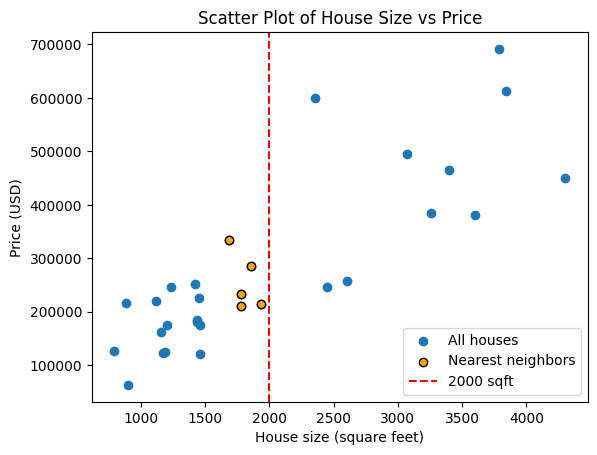

In [36]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [37]:
nearest_neighbors["price"].mean()

np.float64(255630.0)

In [38]:
#now we will redo the analysis with the entire dataset instead of a subset as we did above.
# First, we create a train and test data with 75/25 split.

sacramento_train, sacramento_test = train_test_split(sacramento, train_size=0.75, random_state=42)   #random state can be any integer instead of 42.

In [ ]:
#step 1. define our X and y. For multiple predictor variables, we can add to X_train separated by a comma, within the paranthesis.
X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [40]:
#step 2. Initialize our KNNregressor
knn_regressor = KNeighborsRegressor()

In [41]:
#step 3. define our parameter grid
param_grid = {
    "n_neighbors" : range(1,201,3)
}

In [50]:
#step 4. initialize our grid search
sacr_gridsearch = GridSearchCV(
    estimator=knn_regressor,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error"       #r2 can also be put here instead of neg_root_means_squared
)   

In [51]:
#step 5. Fit our grid search to training data
sacr_gridsearch.fit(X_train,y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(1, 201, 3)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,19


In [69]:
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001507,0.000641,0.001203,0.000398,1,{'n_neighbors': 1},-111432.646994,-124930.376771,-111553.640165,-121189.571040,-110534.126317,-115928.072257,5952.545896,67
1,0.001203,0.000400,0.001000,0.000632,4,{'n_neighbors': 4},-84191.452465,-96768.557437,-99395.447194,-91776.634858,-96991.842965,-93824.786984,5417.090443,50
2,0.001202,0.000399,0.000703,0.000604,7,{'n_neighbors': 7},-82055.054082,-94969.980001,-97268.515757,-88221.977923,-90245.964227,-90552.298398,5335.745149,32
3,0.000928,0.000504,0.000982,0.000035,10,{'n_neighbors': 10},-79700.428498,-94364.712988,-95672.079987,-84119.947681,-88172.348589,-88405.903549,6041.754570,19
4,0.001040,0.000698,0.001295,0.000408,13,{'n_neighbors': 13},-77034.701093,-92991.526184,-96360.545374,-84692.931752,-84919.254540,-87199.791789,6815.832448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.001010,0.000557,0.002248,0.000702,187,{'n_neighbors': 187},-89404.692337,-103880.184049,-110873.710254,-98278.819705,-78553.282689,-96198.137807,11280.135742,62
63,0.000603,0.000492,0.002202,0.000400,190,{'n_neighbors': 190},-89807.967415,-104221.691818,-111088.875603,-98698.022523,-78654.732762,-96494.258024,11318.372825,63
64,0.000996,0.000096,0.002501,0.000613,193,{'n_neighbors': 193},-90255.812044,-104469.469062,-111371.637819,-99100.345423,-78654.579110,-96770.368691,11388.795184,64
65,0.001123,0.000231,0.002353,0.000443,196,{'n_neighbors': 196},-90612.174931,-104531.594900,-111725.067577,-99524.332322,-78755.965603,-97029.827067,11433.017471,65


In [65]:
results = pd.DataFrame(sacr_gridsearch.cv_results_)     # After fitting the model, we extract the cross-validation results using `cv_results_`. This output includes various metrics and parameters tested during the cross-validation process.
results = (
    results[[
        "param_n_neighbors",
        "mean_test_score"
    ]]
    .rename(columns={"param_n_neighbors": "n_neighbors"})
) # we specify the scoring metric as "neg_root_mean_squared_error" to evaluate the model performance based on RMSPE.

print(results)

    n_neighbors  mean_test_score
0             1   -115928.072257
1             4    -93824.786984
2             7    -90552.298398
3            10    -88405.903549
4            13    -87199.791789
..          ...              ...
62          187    -96198.137807
63          190    -96494.258024
64          193    -96770.368691
65          196    -97029.827067
66          199    -97251.873323

[67 rows x 2 columns]


In [66]:
results["mean_test_score"] = -results["mean_test_score"]
# could also code this as results["mean_test_score"] = results["mean_test_score"].abs()
results

,n_neighbors,mean_test_score
0,1,115928.072257
1,4,93824.786984
2,7,90552.298398
3,10,88405.903549
4,13,87199.791789
...,...,...
62,187,96198.137807
63,190,96494.258024
64,193,96770.368691
65,196,97029.827067


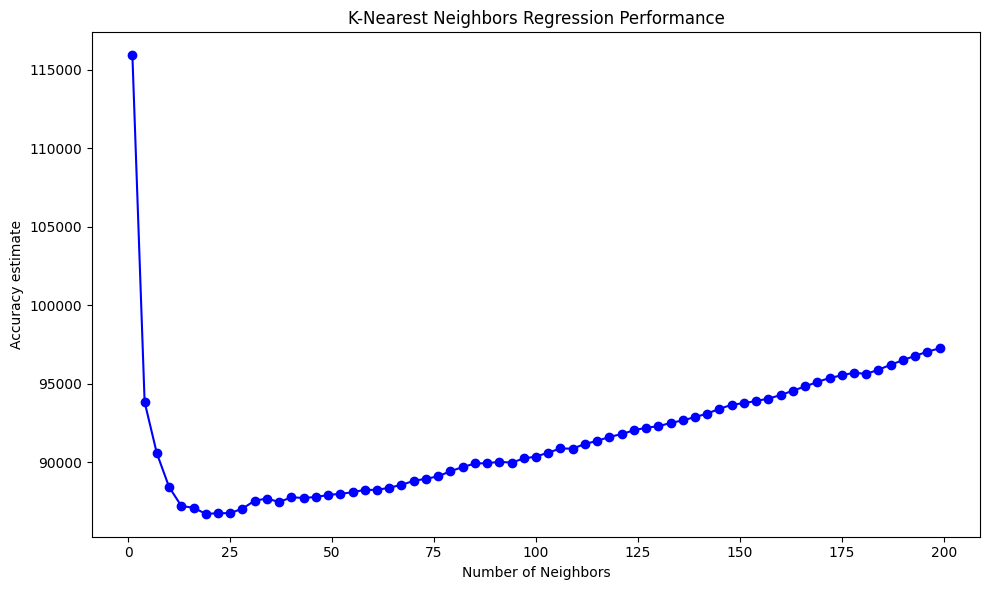

In [64]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [67]:
sacr_gridsearch.best_params_

{'n_neighbors': 19}

In [68]:
#make predictions on the test set
sacramento_test["predicted"] = sacr_gridsearch.predict(sacramento_test[["sq__ft"]])

In [70]:
#Now we will make predictions with test data set. 
#calculate RMSPE

mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**(1/2)

74244.70520282978

In [71]:
#calculate r2
r2_score(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)

0.49520697046011675

c:\Users\junai\Documents\DSI Certificate\Learning\4. LCR\LCR\lcr-env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


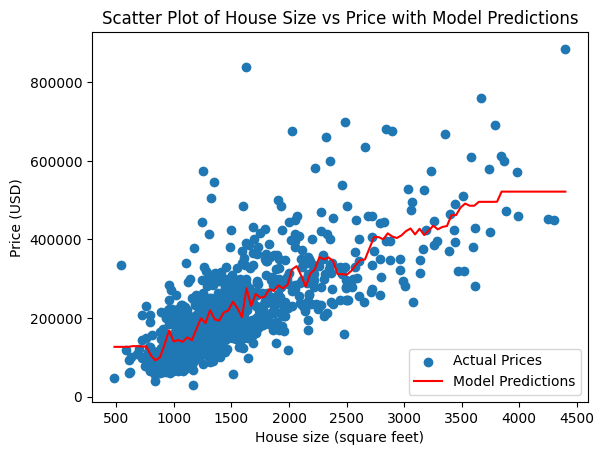

In [72]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show()